## Mahboobeh Hosseini
IST 718 

LAb 2

Week 6 

Prof Fox

# Objective
• This case study provides an opportunity to demonstrate our ability to combine data sets and
produce meaningful analysis. Specifically, we would like to provide a decision maker with more
than just data – we want to provide insights, understanding, and wisdom. This exercise allows
the student an opportunity to demonstrate progress (or mastery) of learning objectives 1, 2, 3,
4, and 5:

# Question
The research question is can we predict which three zip codes provide the best investment
opportunity for the Syracuse Real Estate Investment Trust (SREIT)?
• Using the base data available from Zillow
(files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv)
o Review the data – clean as appropriate
o Provide an initial data analysis to include (but not limited to):
▪ Develop time series plots for the following Arkansas metro areas:
• Hot Springs, Little Rock, Fayetteville, Searcy
• Present all values from 1997 to present
• Average at the metro area level

# datsets used 
Using data from Zillow:
o Develop model(s) for forecasting average median housing value by zip code for 2018
o Use the historical data from 1997 through 2017 as your training data
o Integrate data from other sources (think Bureau of Labor Statistics and Census data) to
improve upon your base model(s)

just like what question asked I used the data from 1997 to 2017 to predict the housing value by zipcode for 2018 




Along with the main datset, the follwoing datsets are used:

FBI crime data for the follwoing states:



*   Maryland
*   Massachusets 
*   Virginia
*   Distruct of Columbia
*   New Hapishire 

Using this datset for these states will help us to narrow down the data based on some aspects like if crime ratio exceeds 3% it will be eliminated.

The other set of data was used from Deparment of labor to narrow down the options based on unemployment. The unemployment ration was not allowed to exceed from 3.5%.

Add the end the adjusted data was narroed down on select locations to redice the modeling.









Now lets get to the coding part and explain the steps as we go on:

# Code 

# Step 1 

Obtain data and understand data structures and data elements.

In [ ]:
# import packages
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
#!pip install zipcodes
import zipcodes
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The packages necessary are imported. 

The dataframe for each datset is created. Also the rows that do not need to be in the loop of analysis are skipped and the comma is eliminated for having numbers as floats. 

Also fillna(0) is replced our NA data with 0. 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mahboobe3/IST_718_lab2-datasets/main/Zip_Zhvi_SingleFamilyResidence.csv')
df = df.fillna(0)

df_columbia = pd.read_csv('https://raw.githubusercontent.com/mahboobe3/IST_718_lab2-datasets/main/district-of-columbia.csv', skiprows = range(1,2),thousands=',')
df_columbia= df_columbia.fillna(0)

df_laucnty = pd.read_csv('https://raw.githubusercontent.com/mahboobe3/IST_718_lab2-datasets/main/laucnty17%20.csv',  skiprows= range(1,6),thousands=',')
df_laucnty=df_laucnty.fillna(0)


df_maryland = pd.read_csv('https://raw.githubusercontent.com/mahboobe3/IST_718_lab2-datasets/main/maryland%20.csv',  skiprows= range(1,5),thousands=',')
df_maryland = df_maryland.fillna(0)

df_mass = pd.read_csv('https://raw.githubusercontent.com/mahboobe3/IST_718_lab2-datasets/main/massachusettss.csv' ,skiprows = range(1,5),thousands=',')
df_mass = df_mass.fillna(0)

df_NH = pd.read_csv('https://raw.githubusercontent.com/mahboobe3/IST_718_lab2-datasets/main/new-hampshire.csv', skiprows= range(1,5),thousands=',')
df_NH = df_NH.fillna(0)

df_virginia = pd.read_csv('https://raw.githubusercontent.com/mahboobe3/IST_718_lab2-datasets/main/virginia.csv',  skiprows= range(1,5),thousands=',')
df_virginia = df_virginia.fillna(0)


### Step 2 

Scrub data using scripting methods, to include debugging, for data manipulation in R and other
tools

In the below code, there is lists created to obtain the data only for columns that have crime types so that we can sum them out to get the overall crime ratio in each State crime data. 



In [ ]:
# crime columns
#dc_col_list = df_crime_dc.iloc[:, 3:12].columns.tolist()
md_col_list = df_maryland.iloc[:, 3:12].columns.tolist()
ma_col_list = df_mass.iloc[:, 3:12].columns.tolist()
va_col_list = df_virginia.iloc[:, 3:12].columns.tolist()
nh_col_list = df_NH.iloc[:, 3:12].columns.tolist()

# crime sum: simplified by summing all offense types
#dc_sum = df_crime_dc[dc_col_list].sum(axis=1)
md_sum = df_maryland[md_col_list].sum(axis=1)
ma_sum = df_mass[ma_col_list].sum(axis=1)
va_sum = df_virginia[va_col_list].sum(axis=1)
nh_sum = df_NH[nh_col_list].sum(axis=1)

# Then each datset will have 4 columns:

city

population

 crimarate which is optain from deviding sum of crime by population

 and Sate

In [ ]:


# crime ratio: offense sum / population
df_md = df_maryland
df_md['City'] = df_maryland.iloc[:, 0]
df_md['State'] = 'md'
df_md['Population'] = df_maryland.iloc[:, 1]
df_md['CrimeRatio'] = md_sum/df_maryland.iloc[:, 1]
df_md = df_maryland[['City', 'Population', 'CrimeRatio', 'State']]

df_ma = df_mass
df_ma['City'] = df_mass.iloc[:, 0]
df_ma['State'] = 'ma'
df_ma['Population'] = df_mass.iloc[:, 1]
df_ma['CrimeRatio'] = ma_sum/df_mass.iloc[:, 1]
df_ma = df_mass[['City', 'Population', 'CrimeRatio', 'State']]

df_va = df_virginia
df_va['City'] = df_virginia.iloc[:, 0]
df_va['State'] = 'va'
df_va['Population'] = df_virginia.iloc[:, 1]
df_va['CrimeRatio'] = va_sum/df_virginia.iloc[:, 1]
df_va = df_virginia[['City', 'Population', 'CrimeRatio', 'State']]

df_nh = df_NH
df_nh['City'] = df_NH.iloc[:, 0]
df_nh['State'] = 'nh'
df_nh['Population'] = df_NH.iloc[:, 1]
df_nh['CrimeRatio'] = nh_sum/df_NH.iloc[:, 1]
df_nh = df_NH[['City', 'Population', 'CrimeRatio', 'State']]

# combine dataframe
df_crime = pd.concat([df_md, df_ma, df_va, df_nh])

# remove unneeded column
df_crime.drop(['Population'], axis=1, inplace=True)

# convert to lowercase
df_crime[['City', 'State']] = df_crime[['City', 'State']].apply(
  lambda x: x.astype(str).str.lower().map(lambda x: x.strip())
)

For the labor data we also create column names and will seperate out county and State as the location 

In [ ]:
# restructure labor columns
df_laucnty = pd.DataFrame(df_laucnty.iloc[:, [3,9]])
df_laucnty.columns = ['Location', 'Unemployment']
df_laucnty[['CountyName', 'State']] = df_laucnty['Location'].str.split(',', expand=True)
df_laucnty.drop(['Location'], axis=1, inplace=True)

In the following process, More data manupulation is done to lower case some of the columns as well as setting columns to either String or intege. Also redundant suffix such as County is removed

In [ ]:
# convert non-timeseries
df[['City', 'State', 'Metro', 'CountyName']] = df[['City', 'State', 'Metro', 'CountyName']].astype(str)
df[['RegionID', 'RegionName', 'SizeRank']] = df[['RegionID', 'RegionName', 'SizeRank']].astype(int)

# convert to lowercase
df[['City', 'State', 'Metro', 'CountyName']] = df[['City', 'State', 'Metro', 'CountyName']].apply(
  lambda x: x.astype(str).str.lower().map(lambda x: x.strip())
)
df_laucnty[['CountyName', 'State']] = df_laucnty[['CountyName', 'State']].apply(
  lambda x: x.astype(str).str.lower().map(lambda x: x.strip())
)


In [ ]:

# remove redundant suffix
df_laucnty['CountyName'] = df_laucnty['CountyName'].str.rstrip('county').map(lambda x: x.strip())

# Develop time series plots for the following Arkansas metro areas:
• Hot Springs, Little Rock, Fayetteville, Searcy

In [ ]:
# arkansas metro areas
hot_springs = df.loc[(df['Metro'] == 'hot springs') & (df['State'] == 'ar')]
little_rock = df.loc[(df['Metro'] == 'little rock') & (df['State'] == 'ar')]
fayetteville = df.loc[(df['Metro'] == 'fayetteville') & (df['State'] == 'ar')]
searcy = df.loc[(df['Metro'] == 'searcy') & (df['State'] == 'ar')]

Now it is time to Merge data with the Crime and Labor data 

In [ ]:
# merge dataframes
df_main = pd.merge(df, df_laucnty, on=['CountyName', 'State'])



In [ ]:
df_main = pd.merge(df_main, df_crime, on=['City', 'State'])
#print(df_main['City'].equals(df_crime['City'])) 
#np.intersect1d(df_main['City'],df_crime['City']).



Making the timeseries from 1996 to 2017 

In [ ]:
# timeseries data
ts_start = df_main.columns.get_loc('1996-04') + 1
ts_end = df_main.columns.get_loc('2017-09')
date_columns = df_main.iloc[:, ts_start:ts_end].columns.tolist()

# ensure integer timeseries
df_main[date_columns] = df_main[date_columns].astype(int)

## step 3

Explore data using essential qualitative analysis techniques including descriptive statistics

Time series models were generated for metro areas in Arkansas:

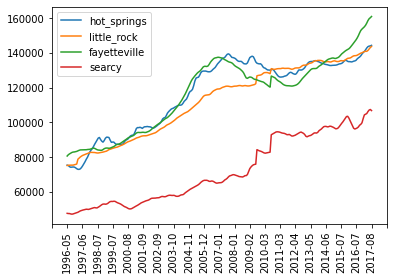

In [ ]:
# timeseries plot
fig, ax = plt.subplots()
ax.plot(hot_springs[date_columns].mean(), linestyle='solid')
ax.plot(little_rock[date_columns].mean(), linestyle='solid')
ax.plot(fayetteville[date_columns].mean(), linestyle='solid')
ax.plot(searcy[date_columns].mean(), linestyle='solid')

# decrease ticks
xmin, xmax = ax.get_xlim()
ax.set_xticks(np.round(np.linspace(xmin, xmax, 23), 2))

# rotate ticks + show legend
plt.xticks(rotation=90)
plt.gca().legend(('hot_springs', 'little_rock', 'fayetteville', 'searcy'))

# show overall plot
plt.show()

Seems like that Fayetteville and Arkansas have the biggesr increase in property prices. After that little Rock anf hot springs were harder to choose from.   

In [ ]:
# remove rows with unemployment >= 3.5%
df_main = df_main[df_main.Unemployment < 3.5]

# remove rows with crime >= 3%
df_main = df_main[df_main.CrimeRatio < 0.03]

# remove redundant columns
df_main.drop(['Unemployment'], axis=1, inplace=True)
#df_main.drop(['CrimeRatio'], axis=1, inplace=True)

In [ ]:
# filter specific states
df_main = df_main.loc[df_main['State'].isin(['md','va', 'nh', 'ma', 'dc'])]

# remove specific cities
df_main = df_main.loc[-((df_main['Metro'] == 'baltimore') & (df_main['State'] == 'md'))]

In [ ]:
# train: collapse column by median
train_start = df_main.columns.get_loc('1997-01')
train_stop = df_main.columns.get_loc('2017-01')
test_stop = df_main.columns.get_loc('2017-09')
train_columns = df_main.iloc[:, train_start:train_stop].columns.tolist()
test_columns = df_main.iloc[:, (train_stop + 1):test_stop].columns.tolist()

In [ ]:
# remove rows with 0's beginning (1997-01) with trainset
date_columns = df.iloc[:, train_start:test_stop].columns.tolist()

df_main[date_columns] = df_main[date_columns].replace(0, np.nan)
df_main[date_columns] = df_main[date_columns].dropna()

## Arima Model

an ARIMA model was generated using a train dataset to determine whether a time series model could generalize housing data.

In [ ]:
#
# transpose dataframe: left column data, right column value
#
#     date1  val1
#     date2  val2
#      ...   ...
#     daten  valn
#
df_train = df_main[train_columns].median().T
df_test = df_main[test_columns].median().T

#
# build arima model:
#
#     AR: autoregression, uses observations from previous time steps as input to
#         a regression equation to predict the value at the next time step.
#
#     I: integrated, use of differencing of raw observations, or subtracting an
#         observation from previous time step. The goal is to attain a time
#         series that is stationary.
#
#     MA: moving average, uses the dependency between an observation and a residual
#         error from a moving average model applied to lagged observations.
#
model = ARIMA(df_train, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  239
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1992.195
Method:                       css-mle   S.D. of innovations           1006.221
Date:                Sun, 14 Aug 2022   AIC                           3998.391
Time:                        21:31:35   BIC                           4022.726
Sample:                    02-01-1997   HQIC                          4008.197
                         - 12-01-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1011.7752    484.778      2.087      0.038      61.627    1961.923
ar.L1.D.y      0.7894      0.065     12.235      0.000       0.663       0.916
ar.L2.D.y     -0.0996      0.082     -1.211      0.2

Also an residual and Kernel Density plot was plotted using the same train dataset.

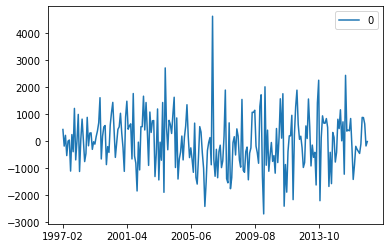

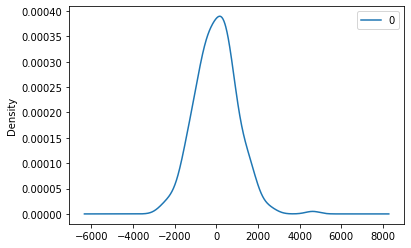

                 0
count   239.000000
mean     -2.280410
std    1008.615888
min   -2682.955422
25%    -675.904469
50%       8.949550
75%     594.911192
max    4625.778355


In [ ]:
# plot residual errors
def residuals_plot(model_fit):
    residuals = DataFrame(model_fit.resid)
    residuals.plot()
    plt.show()

    # plot kernel density estimation
    residuals.plot(kind='kde')
    plt.show()

    # descriptibe statistics
    print(residuals.describe())

residuals_plot(model_fit)

# Descriptive Statistics for the Overall Arima Model 

In [ ]:
#
# rolling prediction (verify model): month +2, since the train
#     includes 2017-01.
#
# Note: rolling prediction is required since there is an implicit
#       dependence on observations in prior time steps inheritted
#       when autogressive (AR) model was defined.
#
history = [x for x in df_train]
predictions = list()
iterations = (12-len(df_test)) + 18

for t in range(iterations):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)

    if t > 10:
        year = 2018
        month = (t+2) % 12
        if month == 0:
            month = 12
    else:
        year = 2017
        month = t+2
        if month == 0:
            month = 12

    print('\n===============================================')
    print('date: {}-{:01d}'.format(year, month))
    print('-----------------------------------------------')

    #
    # observation: if current value doesn't exist from test, append current
    #     predition, to ensure successive rolling prediction computed.
    #
    try:
        obs = df_test[t]
        print('predicted={:03f}, expected={:03f}'.format(float(yhat), obs))
        print('prediction difference: {:03f}'.format(abs(1-float(yhat)/obs)))
        print('\n===============================================')
        error = mean_squared_error(df_test, predictions)
        print('Test MSE: {:03f}\n\n'.format(error))
    except:
        obs = yhat
        print('predicted={:03f}'.format(float(yhat)))

    history.append(obs)


date: 2017-2
-----------------------------------------------
predicted=388813.784996, expected=391050.000000
prediction difference: 0.005718

predicted=388813.784996


/usr/local/lib/python3.7/dist-packages/statsmodels/base/data.py:629: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  endog = np.asarray(endog)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:424: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _endog = endog if hasattr(endog, 'ndim') else np.asarray(endog)



date: 2017-3
-----------------------------------------------
predicted=390444.532318, expected=392900.000000
prediction difference: 0.006250

predicted=390444.532318

date: 2017-4
-----------------------------------------------
predicted=392004.612798, expected=395800.000000
prediction difference: 0.009589

predicted=392004.612798

date: 2017-5
-----------------------------------------------
predicted=393505.835410, expected=398850.000000
prediction difference: 0.013399

predicted=393505.835410

date: 2017-6
-----------------------------------------------
predicted=394962.601508, expected=400850.000000
prediction difference: 0.014687

predicted=394962.601508

date: 2017-7
-----------------------------------------------
predicted=396379.434956, expected=402250.000000
prediction difference: 0.014594

predicted=396379.434956

date: 2017-8
-----------------------------------------------
predicted=397758.287855, expected=403400.000000
prediction difference: 0.013985

Test MSE: 22135564.161

/usr/local/lib/python3.7/dist-packages/statsmodels/base/data.py:629: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  endog = np.asarray(endog)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:424: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _endog = endog if hasattr(endog, 'ndim') else np.asarray(endog)



date: 2017-9
-----------------------------------------------
predicted=409220.293736

date: 2017-10
-----------------------------------------------
predicted=413528.277745

date: 2017-11
-----------------------------------------------
predicted=417509.770072

date: 2017-12
-----------------------------------------------
predicted=421466.075235

date: 2018-1
-----------------------------------------------
predicted=425224.938395

date: 2018-2
-----------------------------------------------
predicted=428712.077310

date: 2018-3
-----------------------------------------------
predicted=431974.458220

date: 2018-4
-----------------------------------------------
predicted=435056.952389

date: 2018-5
-----------------------------------------------
predicted=437974.299468

date: 2018-6
-----------------------------------------------
predicted=440735.970435

date: 2018-7
-----------------------------------------------
predicted=443355.249616

date: 2018-8
-------------------------------------

# Predicted VS actual values 

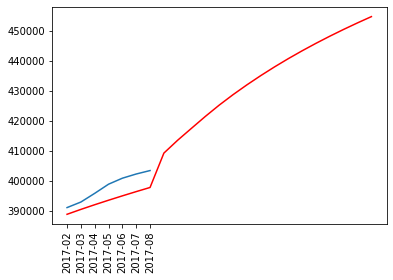

In [ ]:
# plot rolling prediction
def rolling_plot(data, predictions):
    plt.plot(data)
    plt.plot(predictions, color='red')
    plt.xticks(rotation=90)
    plt.show()

rolling_plot(df_test, predictions)

Upon reviewing the above train case, it is evident that none of the difference between the predicted with the actual test data exceed 1.5%. Therefore, the implementation of ARIMA(5,1,0) for the entire population, was extended for each individual zip code. However, since the internal statsmodels.tsa.arima_model does not allow d > 2 , the differencing was indirectly applied, by adapting the actual dataset only when the base implementation would not succeed.

Each zipcode data was passed to a custom compute_arima function. However, a direct implementation could sometimes fail. Specifically, the statsmodels package could fail with LinAlgError: SVD did not converge  with unusual combination of data with arima arguments. This potential of this arising was reconciled by incrementing the difference factor until the error was eliminated.
A computed rolling prediction successfully generated n predictions after the train. Conveniently, earlier edge cases did not arise. Therefore, each computation succeeded with a standard non-iterative differencing strategy.


In [ ]:
# stationarity test
def difference(dataset, interval):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

def compute_arima(
    data=df_train,
    p=5,
    q=0,
    d=0,
    delta=(12-len(df_test)) + 18,
    alpha=0.05,
    rplot=False,
    summary=False
):
    #
    # Note: rolling prediction is required since there is an implicit
    #       dependence on observations in prior time steps inheritted
    #       when autogressive (AR) model was defined.
    #
    history = [x for x in data]
    predictions = list()
    model_fit = False

    # generate model
    try:
        model = ARIMA(difference(history, delta), order=(p,q,d))
        model_fit = model.fit(disp=0)
        print('standard fit used')
    except Exception as e:
        print('stationary differences will be used')
        print('original error: {}'.format(e))

    # significant stationarity: use any that works
    if not model_fit:
        #
        # determine stationarity value: differencing handled with supplied data,
        #     as an indirect solution, since statsmodel not allow d > 2.
        #
        # @delta, autoregressive factor.
        #
        for delta in range(10):
            stationary = difference(history, delta)
            stationary.index = history[1:]
            result = adfuller(stationary)
            print('stationary fit: {}, p: {}'.format(delta, result[1]))

            #
            # generate model: use high (10) autoregression, since data is not
            #     seasonal. Therefore, using previous values is conservative.
            #
            if (result[1] <= 0.05):
                try:
                    model = ARIMA(stationary, order=(p,q,d))
                    model_fit = model.fit(disp=0)
                    break
                except Exception as e:
                    print('bad condition {}: stationarity not adequate'.format(delta))
                    print('original error: {}'.format(e))
                    continue

    #
    # generate forecast: an inverse difference is needed to reverse the earlier
    #     difference model scaling.
    #
    if model_fit:
        output = model_fit.forecast(steps=delta, alpha=alpha)[0]
        if rplot:
            residuals_plot(model_fit)
        if summary:
            print(model_fit.summary())

    for yhat in output:
        inverted = inverse_difference(history, yhat, interval=delta)
        history.append(inverted)
        predictions.append(inverted)

    print('predictions: {}'.format(predictions))

    return(predictions)

def get_zipcode(city, state):
    result = zipcodes.filter_by(
        zipcodes.list_all(),
        active=True,
        city=city,
        state=state
    )

    if result and result[0] and result[0]['zip_code']:
        return(result[0]['zip_code'])
    else:
        return(0)

Using the Zipcodes package we can get the zipcoed based on City and State 

In [ ]:
# add zipcode column
df_main['zip_code'] = df_main[['City', 'State']].apply(
    lambda x: get_zipcode(
        x['City'],
        x['State']
    ),
    axis=1
)

In [ ]:
#testing
get_zipcode('Chicago','IL')

'60601'

In [ ]:
df_main['City'] = df_main['City'].apply(lambda x: x.capitalize())

In [ ]:
df_main['State'] = df_main['State'].apply(lambda x: x.upper())


In [ ]:
def get_zipcode(city, state):
    result = zipcodes.filter_by(
        zipcodes.list_all(),
        active=True,
        city=city,
        state=state
    )

    if result and result[0] and result[0]['zip_code']:
        return(result[0]['zip_code'])
    else:
        return(0)

# Step 4
Model relationships between data using the appropriate analytical methodologies matched to
the information and the needs of clients and users.

A combination of full original dataset duration which shows similar trens

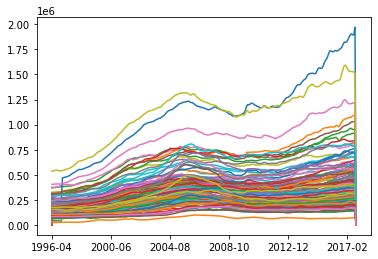

In [ ]:
# group by zipcode
df_zipcode = df_main.groupby('zip_code').agg(np.median).dropna().T

#
# remove columns: column 0 indicates an NaN column
#
df_zipcode_clean = df_zipcode.drop([
    'RegionName',
    'RegionID',
    'SizeRank'
], axis=0)
df_zipcode_clean = df_zipcode_clean.drop([0], axis=1)

df_zipcode_clean.plot(legend=None)
plt.show()

The  iterative process below coincided with the test data and was used to validate the strength of the model. The successive 16 months were used for future forecasting.



In [ ]:
# iterate columns
results = []
for column in df_zipcode_clean.T[train_columns].T:
    predictions = compute_arima(df_zipcode_clean[column], q=1)
    results.append({
        'zip_code': df_zipcode_clean[column].name,
        'predictions': predictions
    })

standard fit used
predictions: [141986.01303846863, 146728.12121942142, 153771.78167136403, 156876.00448198084, 154173.29854461894, 149814.88925636912, 154433.84439747687, 156626.08166738658, 157739.2222265358, 158254.95875081423, 158419.43748403736, 159034.56243202966, 160048.41714511736, 161348.62439286822, 162953.6263773281, 164356.7452372218, 165256.40702498145, 166255.1881818012, 167855.30202695398, 170655.35793109756, 173755.55576232003, 175655.72943980186, -167344.1495788526]
standard fit used
predictions: [106132.51777229144, 103513.37488756892, 103447.57447355735, 105759.35966854937, 107223.85876719728, 105760.60765010549, 107729.44855104804, 107749.96061064694, 108096.6067114785, 108502.73297481047, 108795.76764045536, 109244.49834898673, 110531.35898717544, 112107.77446206754, 113984.25859010374, 115561.70931992287, 116539.03825962731, 117615.82804005635, 117993.01939920419, 116870.10518604741, 115747.1874200222, 115324.28311152617, -122498.5982044275]
standard fit used
pred

In [ ]:
## local variables
agg = []

# sum difference squared
for zipcode in results:
    z = zipcode['zip_code']
    actual = df_zipcode_clean.T[test_columns].T[z]
    print(actual)
    predicted = zipcode['predictions']
    print('=================================================')
    print(z)
    print('=================================================')

    # compare differences
    sum = 0
    for act, pred in zip(actual, predicted[:len(test_columns)]):
        sum += sqrt((act - pred)**2)
        print('predicted={:03f}, expected={:03f}'.format(float(pred), act))
        print('prediction difference: {:03f}'.format(abs(1-float(pred)/act)))
        print('-------------------------------------------------')

    print('\n')

    # aggregate data
    agg.append({
        'zipcode': zipcode['zip_code'],
        'difference': sum,
        'predicted': predicted
    })

# sort results: allows the n lowest to be collected
sorted_results = sorted(agg, key=lambda x: (x['difference']))

2017-02    330300.0
2017-03    331700.0
2017-04    332600.0
2017-05    333600.0
2017-06    335200.0
2017-07    338000.0
2017-08    341100.0
Name: 01002, dtype: float64
01002
predicted=141986.013038, expected=330300.000000
prediction difference: 0.570130
-------------------------------------------------
predicted=146728.121219, expected=331700.000000
prediction difference: 0.557648
-------------------------------------------------
predicted=153771.781671, expected=332600.000000
prediction difference: 0.537668
-------------------------------------------------
predicted=156876.004482, expected=333600.000000
prediction difference: 0.529748
-------------------------------------------------
predicted=154173.298545, expected=335200.000000
prediction difference: 0.540056
-------------------------------------------------
predicted=149814.889256, expected=338000.000000
prediction difference: 0.556761
-------------------------------------------------
predicted=154433.844397, expected=341100.00000

# Results and Analysis 

standard fit used


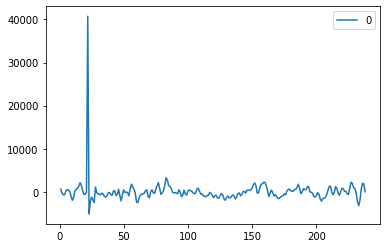

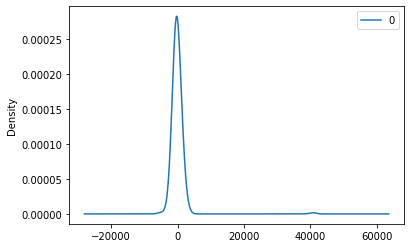

                  0
count    238.000000
mean      -3.291460
std     2871.714075
min    -5148.702091
25%     -872.522977
50%     -243.720003
75%      505.858760
max    40744.345079
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  238
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2232.411
Method:                       css-mle   S.D. of innovations           2865.631
Date:                Sun, 14 Aug 2022   AIC                           4478.823
Time:                        22:24:58   BIC                           4503.129
Sample:                             1   HQIC                          4488.618
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.5221    362.1

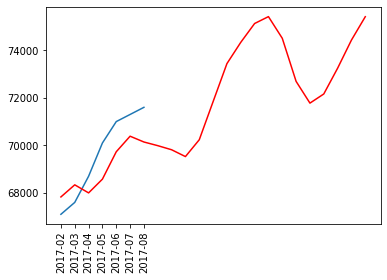

standard fit used


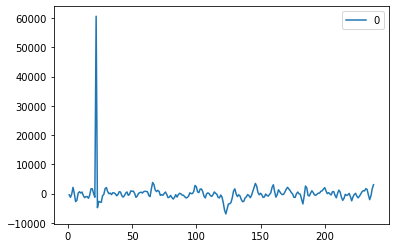

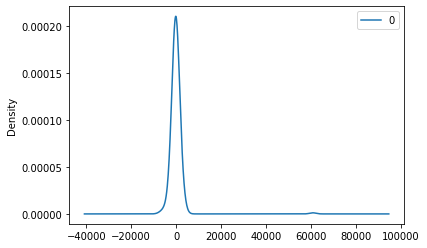

                  0
count    238.000000
mean       3.865037
std     4213.134963
min    -6984.593380
25%     -971.072227
50%     -239.968487
75%      600.230644
max    60673.891567
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  238
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2323.569
Method:                       css-mle   S.D. of innovations           4204.255
Date:                Sun, 14 Aug 2022   AIC                           4661.137
Time:                        22:24:59   BIC                           4685.443
Sample:                             1   HQIC                          4670.933
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        242.4370    370.6

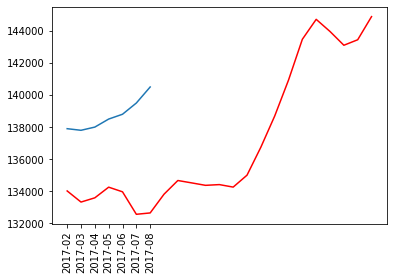

standard fit used


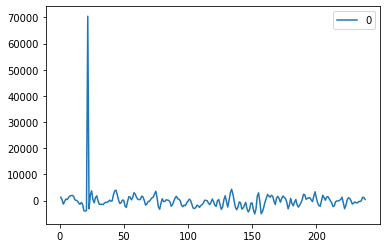

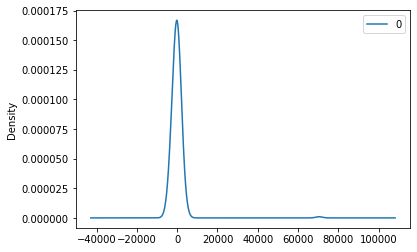

                  0
count    238.000000
mean      -1.134241
std     4907.772163
min    -5106.909258
25%    -1439.042694
50%     -181.924936
75%      915.113941
max    70468.856482
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  238
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2359.876
Method:                       css-mle   S.D. of innovations           4897.442
Date:                Sun, 14 Aug 2022   AIC                           4733.752
Time:                        22:25:00   BIC                           4758.058
Sample:                             1   HQIC                          4743.548
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        302.9412    292.1

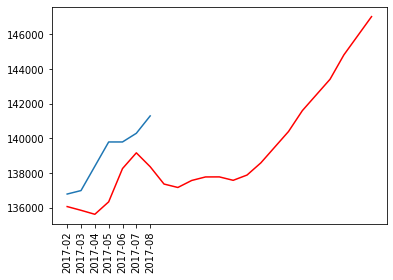

standard fit used


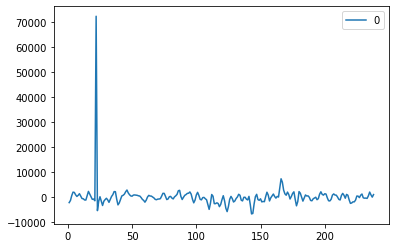

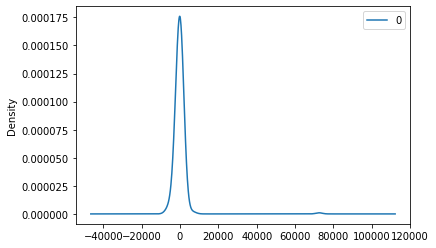

                  0
count    238.000000
mean       2.048710
std     5027.936397
min    -6835.429024
25%    -1178.704648
50%     -120.103053
75%      716.810319
max    72487.949933
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  238
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2365.635
Method:                       css-mle   S.D. of innovations           5017.328
Date:                Sun, 14 Aug 2022   AIC                           4745.269
Time:                        22:25:01   BIC                           4769.575
Sample:                             1   HQIC                          4755.065
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        306.7227    404.7

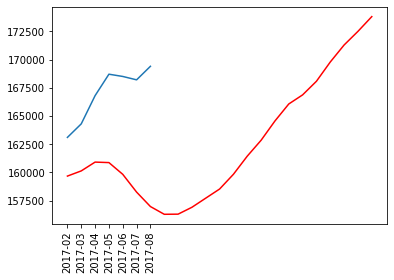

In [ ]:
# best 4 models
for model in sorted_results[:4]:
    # get data
    zipcode = model['zipcode']
    data_zipcode = df_zipcode_clean[[zipcode]]
    data_train = data_zipcode.T[train_columns].T
    
    # compute_arima
    predictions = compute_arima(
        data_train.iloc[:,0],
        q=1,
        rplot=True,
        summary=True
    )

    # plot predictions
    rolling_plot(data_zipcode.T[test_columns].T, predictions)

# Analysis 


The most accurate model was found to be Grottoes, VA (24441). The rolling prediction for successive months starting 2017-02

The second most accurate model was found to be Dayton, VA (22821). The rolling prediction for successive months starting 2017-02

The fourth most accurate model was found to be Ringe, NH (03461). The rolling prediction for successive months starting 2017-02


When reviewing the top four performing models, it is evident that the first seven months for each model, never exceeded 3% difference between from the corresponding test value. Therefore, it is safe to assume the corresponding models are valid, and the successive 16 months are interesting.
An attempt was made to investigate other modeling packages for this study. Specifically, an alternative fbprophet  python package was briefly attempted. 


# Conclusions
In this study,  amongst four Arkansas metro area, each depicting a similar trend, while Fayetteville having much greater recent value. Next, an overall ARIMA rolling model showed a highly accurate model. Specifically, at each interval-step, the predicted value contained less than a 1% error. Therefore, this approach was adopted when attempting to aggregate the dataset by zipcode, then predicting successive months of prediction.
When reviewing the above results, it was found that the top four zipcodes aggregated by crime, unemployment, and by location (MD, VA, D.C., MA, NH) were three in Virginia, and one New Hampshire. Though the results are highly accurate, and succeeds to model the defined constraints, it would have been more interesting to model the most profit returning zipcode. Adjusting the necessary code to make this determination is trivial. Specifically, measuring a series of prediction with the greatest positive rolling difference could be one way to capture this information.
Overall, this study succeeded at demonstrating concepts of timeseries forecasting using ARIMA. 

Furthermore, understanding other approaches, and algorithms could complement similar studies, by improving either the performance or modeling accuracy. However, adding an additional data source with respect to school district performance, or accessibility to public transportation by zipcode could likely improve the model.


In [ ]:
print(sorted_results)

[{'zipcode': '03570', 'difference': 391117.3172062246, 'predicted': [16704.60027587494, 14677.828228092767, 14039.757288026456, 13372.495618437788, 12566.644058019527, 13209.95369560671, 11711.403629717184, 9581.984685498224, 8387.892139231306, 8513.778669485459, 9370.242921610952, 10302.729203635718, 11050.37848995634, 11197.553675955227, 11345.4862624386, 11793.90958256284, 12842.016571011984, 14190.64923870765, 15039.194498215104, 15287.784475457942, 15536.388399539966, 15784.99428696619, -56166.356766476274]}, {'zipcode': '03465', 'difference': 566785.7799984574, 'predicted': [57451.56813908882, 56461.17273234486, 55391.35624429639, 56364.358253795144, 58408.63482305656, 58901.77900866119, 61235.350800299595, 63486.02762018237, 64428.65235831385, 63388.11830676957, 62252.08613145318, 62298.194682812435, 63456.003347066275, 65111.336550214604, 66166.47956007422, 66021.79059559359, 66177.18430784413, 66632.4123680507, 66887.72793967964, 67543.02818049691, 68498.32571743257, 69053.624